# Explore here

- Sistema de agrupación de casas
Queremos ser capaces de clasificar casas según su la región en la que se encuentren y del ingreso medio. Para ello, utilizaremos el famoso conjunto de datos California Housing. Se construyó utilizando los datos del censo de California de 1990. Contiene una fila por grupo de bloques censales. Un grupo de bloques es la unidad geográfica más pequeña para la que se publican datos del censo de USA.

## Paso 1: Carga del conjunto de datos


In [1]:
import pandas as pd
import numpy as np


dataframe = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/k-means-project-tutorial/main/housing.csv")

dataframe

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [2]:
# Nos quedamos con las columnas de interés: Latitude, Longitude y MedInc
dataframe_final = dataframe[['MedInc','Latitude', 'Longitude']]

dataframe_final

,MedInc,Latitude,Longitude
0,8.3252,37.88,-122.23
1,8.3014,37.86,-122.22
2,7.2574,37.85,-122.24
3,5.6431,37.85,-122.25
4,3.8462,37.85,-122.25
...,...,...,...
20635,1.5603,39.48,-121.09
20636,2.5568,39.49,-121.21
20637,1.7000,39.43,-121.22
20638,1.8672,39.43,-121.32


In [3]:
# Dividimos el conjunto de datos en train y test

from sklearn.model_selection import train_test_split

dataframe_final_train, dataframe_final_test = train_test_split(dataframe_final, test_size=0.2, random_state=42)

dataframe_final_train.head()


,MedInc,Latitude,Longitude
14196,3.2596,32.71,-117.03
8267,3.8125,33.77,-118.16
17445,4.1563,34.66,-120.48
14265,1.9425,32.69,-117.11
2271,3.5542,36.78,-119.80


In [4]:
dataframe_final_test.head()

,MedInc,Latitude,Longitude
20046,1.6812,36.06,-119.01
3024,2.5313,35.14,-119.46
15663,3.4801,37.80,-122.44
20484,5.7376,34.28,-118.72
9814,3.7250,36.62,-121.93


## Paso 2: Construye un K-Means

In [5]:
from sklearn.cluster import KMeans

# Construimos el modelo K-Means con 6 clusters
kmeans = KMeans(n_clusters=6, random_state=42, n_init=10)

# Entrenamos el modelo con los datos de entrenamiento
kmeans.fit(dataframe_final_train)




KMeans(n_clusters=6, n_init=10, random_state=42)

In [6]:
# Obtenemos los clusters para los datos de entrenamiento y prueba
train_clusters = kmeans.predict(dataframe_final_train)
test_clusters = kmeans.predict(dataframe_final_test)

# Agregamos las columnas de cluster a los conjuntos de datos
dataframe_final_train['cluster'] = train_clusters

dataframe_final_train

,MedInc,Latitude,Longitude,cluster
14196,3.2596,32.71,-117.03,0
8267,3.8125,33.77,-118.16,0
17445,4.1563,34.66,-120.48,3
14265,1.9425,32.69,-117.11,0
2271,3.5542,36.78,-119.80,3
...,...,...,...,...
11284,6.3700,33.78,-117.96,2
11964,3.0500,34.02,-117.43,0
5390,2.9344,34.03,-118.38,0
860,5.7192,37.58,-121.96,1


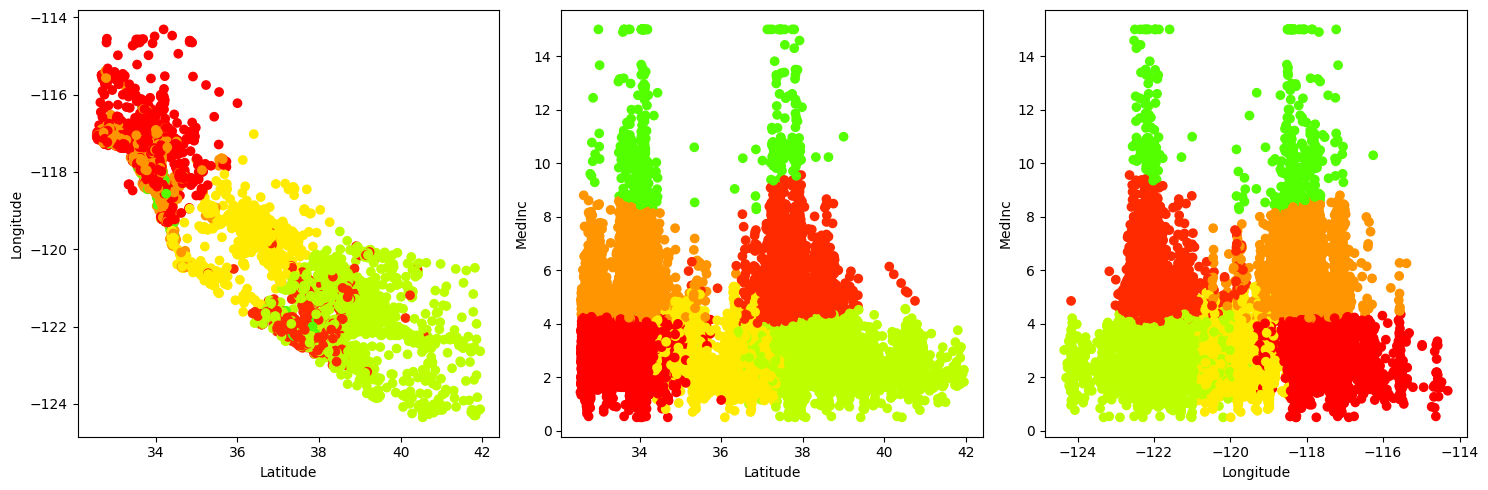

In [7]:
import matplotlib.pyplot as plt

fig, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].scatter(dataframe_final_train["Latitude"], dataframe_final_train["Longitude"], c=dataframe_final_train["cluster"], cmap="prism")
axis[0].set_xlabel("Latitude")
axis[0].set_ylabel("Longitude")

axis[1].scatter(dataframe_final_train["Latitude"], dataframe_final_train["MedInc"], c=dataframe_final_train["cluster"], cmap="prism")
axis[1].set_xlabel("Latitude")
axis[1].set_ylabel("MedInc")

axis[2].scatter(dataframe_final_train["Longitude"], dataframe_final_train["MedInc"], c=dataframe_final_train["cluster"], cmap="prism")
axis[2].set_xlabel("Longitude")
axis[2].set_ylabel("MedInc")

plt.tight_layout()
plt.show()

## Paso 3: Predice con el conjunto de test

In [8]:
y_test = list(kmeans.predict(dataframe_final_test))
dataframe_final_test["cluster"] = y_test
dataframe_final_test.head()

,MedInc,Latitude,Longitude,cluster
20046,1.6812,36.06,-119.01,3
3024,2.5313,35.14,-119.46,3
15663,3.4801,37.80,-122.44,4
20484,5.7376,34.28,-118.72,2
9814,3.7250,36.62,-121.93,4


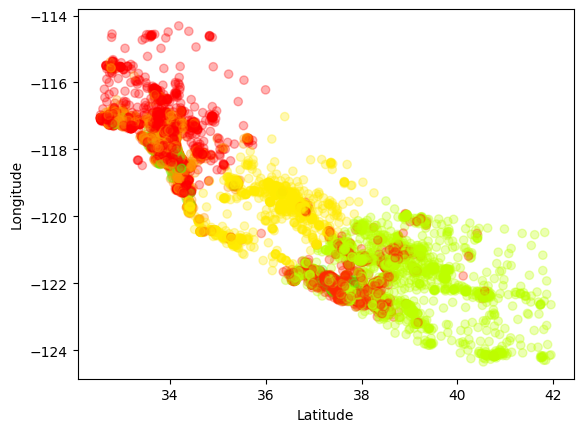

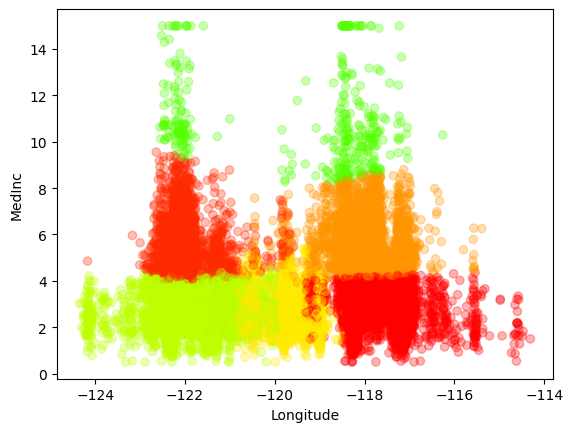

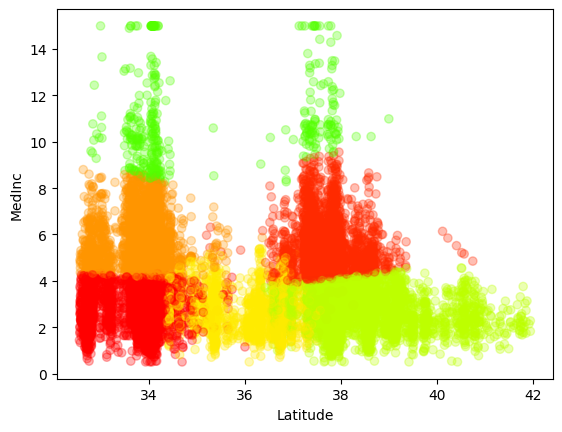

In [9]:
import matplotlib.pyplot as plt

# Gráfico con los datos de entrenamiento
plt.scatter(dataframe_final_train['Latitude'], dataframe_final_train['Longitude'], c=dataframe_final_train['cluster'], cmap='prism', alpha=0.3)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

plt.scatter(dataframe_final_train['Longitude'], dataframe_final_train['MedInc'], c=dataframe_final_train['cluster'], cmap='prism', alpha=0.3)
plt.xlabel('Longitude')
plt.ylabel('MedInc')
plt.show()

plt.scatter(dataframe_final_train['Latitude'], dataframe_final_train['MedInc'], c=dataframe_final_train['cluster'], cmap='prism', alpha=0.3)
plt.xlabel('Latitude')
plt.ylabel('MedInc')
plt.show()


## Paso 4: Entrena un modelo de clasificación supervisada


In [10]:
#hacemos modelo regresion logistica

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Entrenar un modelo de Regresión Logística con más iteraciones (e.g., 1500)
model = LogisticRegression(random_state=42, max_iter=1500)
model.fit(dataframe_final_train, dataframe_final_train['cluster'])

# Hacer predicciones en el conjunto de prueba
y_pred = model.predict(dataframe_final_test)

# Obtener la precisión y mostrarla
accuracy = accuracy_score(dataframe_final_test['cluster'], y_pred)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


c:\Users\Jaime\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Paso 5: Guarda los modelos


In [11]:
import joblib

# Guardar el modelo K-Means
joblib.dump(kmeans, 'kmeans_model.sav')



['kmeans_model.sav']

In [12]:
# Guardar el modelo de Regresión Logística
joblib.dump(model, 'logistic_regression_model.sav')

['logistic_regression_model.sav']